In [116]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [123]:
path=f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"  
protiens=np.unique([x for x in os.listdir(path) if (("_MOUSE.csv" in x) and ("RSS_comparision_" in x))])
print(len(protiens))

data=pd.DataFrame()
for file in protiens:
    data=pd.concat([data,pd.read_csv(path+file)])
print(data.shape)

data.RSS_compelete=data.RSS_compelete**0.5
data.RSS_FirstThree=data.RSS_FirstThree**0.5


2286
(19186, 9)


In [124]:
data.describe()

,charge,RSS_compelete,RSS_FirstThree,MAP_C,MAP_P,L1_distance_C,L1_distance_p
count,19186.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000
mean,2.465756,0.010781,0.018136,15.592418,7.303081,0.084343,0.085752
std,0.646395,0.012177,0.026203,15.333429,12.038677,0.110108,0.126366
min,2.000000,0.000192,0.000022,0.082674,0.006705,0.001076,0.000098
25%,2.000000,0.003695,0.005325,7.267929,2.030493,0.027179,0.024925
50%,2.000000,0.006843,0.009823,12.290528,3.750984,0.050165,0.046023
75%,3.000000,0.013341,0.019842,18.913878,7.525521,0.097910,0.093145
max,7.000000,0.163316,0.331054,259.266071,208.338273,1.572208,1.603130


1 RSS
===

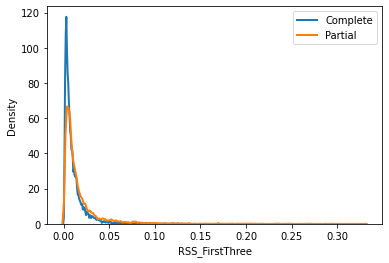

In [122]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(data.RSS_compelete, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Complete')
sns.distplot(data.RSS_FirstThree, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Partial')
plt.legend()

0.01 Threshold
===

In [95]:
print(r'RSS_Complete < 0.01 =>',"{0:0.2f}%".format(data[data.RSS_compelete<0.01].shape[0]*100/data.shape[0]))
print('RSS_Partial < 0.01 => ',"{0:0.2f}%".format(data[data.RSS_FirstThree<0.01].shape[0]*100/data.shape[0]))

RSS_Complete < 0.01 => 63.58%
RSS_Partial < 0.01 =>  49.53%


Compelete profile > 0.01 and Partial profile < 0.01
==

In [96]:
"{0:0.2f}%".format(data.query(' RSS_compelete>0.01 and RSS_FirstThree<0.01').shape[0]*100/data.shape[0])

'3.62%'

0.005 Threshold
===

In [97]:
print(r'RSS_Complete < 0.005 =>',"{0:0.2f}%".format(data[data.RSS_compelete<0.005].shape[0]*100/data.shape[0]))
print('RSS_Partial < 0.005 => ',"{0:0.2f}%".format(data[data.RSS_FirstThree<0.005].shape[0]*100/data.shape[0]))

RSS_Complete < 0.005 => 35.91%
RSS_Partial < 0.005 =>  22.49%


Compelete profile > 0.005 and Partial profile < 0.005
===

In [98]:
"{0:0.2f}%".format(data.query(' RSS_compelete>0.005 and RSS_FirstThree<0.005').shape[0]*100/data.shape[0])

'3.96%'

2 Mean absolute percentage difference (MAP)
===

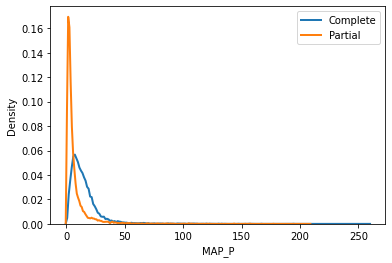

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(data.MAP_C, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Complete')
sns.distplot(data.MAP_P, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Partial')
plt.legend()

MAP < 10%
===

In [107]:
print(r'map_Complete < 10% =>',"{0:0.2f}%".format(data[data.MAP_C<10].shape[0]*100/data.shape[0]))
print('map_Partial < 10% => ',"{0:0.2f}%".format(data[data.MAP_P<10].shape[0]*100/data.shape[0]))

map_Complete < 10% => 38.64%
map_Partial < 10% =>  80.15%


Compelete profile > 10% and Partial profile < 10%
===

In [108]:
"{0:0.2f}%".format(data.query(' MAP_C>10 and RSS_FirstThree<10').shape[0]*100/data.shape[0])

'59.20%'